In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import imp
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence
from lsst.sims.photUtils import Bandpass, PhotometricParameters
from lsst.utils import getPackageDir

In [3]:
def look(img, range=None, x_range=None, y_range=None):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    plt.figure(figsize=(8, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
    img_use = np.clip(img, range[0], range[1])
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [333]:
repository = "/Users/sullivan/LSST/simulations/test6/output_data"
obsid_range = [202, 224, 3]
band_name = "g"

In [334]:
imp.load_source('dcr_1d_correction', '/Users/sullivan/LSST/LSST-DCR/experimental_DCR/python/dcr_1d_correction.py')
from dcr_1d_correction import DcrCorrection

In [335]:
self = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name)

In [336]:
dcr_matrix_extend = reduce(lambda mat1, mat2: np.append(mat1, mat2, axis=0), self.dcr_matrix)
dcr_matrix_reg = np.append(dcr_matrix_extend, self.regularize, axis=0)
mat_inv = np.linalg.pinv(dcr_matrix_reg.T.dot(dcr_matrix_reg))
transfer = mat_inv.dot(dcr_matrix_extend.T)

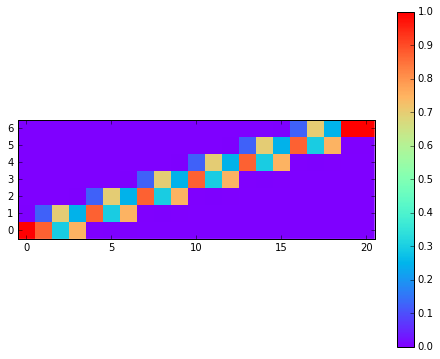

In [337]:
look(self.dcr_matrix[3])

In [338]:
self.build_transfer_matrix()

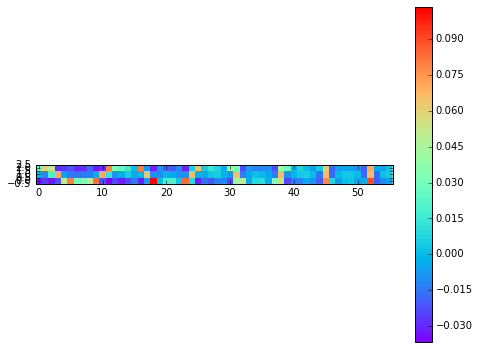

In [339]:
look(self.transfer[3])

In [340]:
self.build_model()

In [341]:
model_arr = []
for m_i in range(self.n_step):
    model_arr.append(self.view_model(m_i))

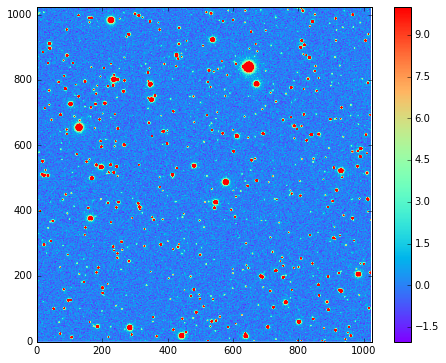

In [342]:
# model = np.zeros(model_arr[0].shape)
# for m in model_arr:
#     model += m
look(model_arr[1], range=[-1e1,1e1])

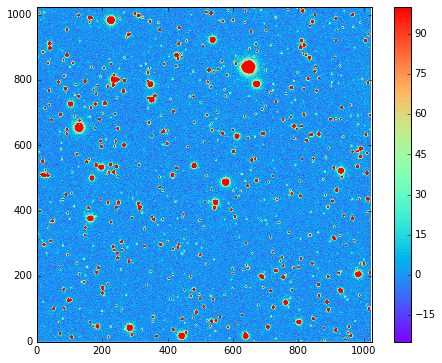

In [343]:
template_exposure_gen = self.generate_templates_from_model(obsid_range=208, output_directory='/Users/sullivan/LSST/simulations/test6/')
for exp in template_exposure_gen:
    look(exp.getMaskedImage().getImage().getArray(), range=[-1e2,1e2])

In [232]:
calexp = self.butler.get("calexp", dataId={'visit': 208, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})

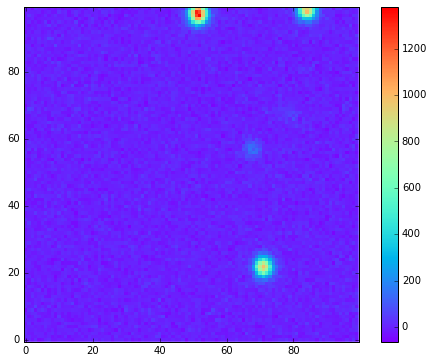

In [233]:
look((calexp.getMaskedImage().getImage().getArray())[0:100,0:100])